In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [52]:
# from pandas_gbq import read_gbq
# merged_data = read_gbq(f"""


# SELECT *
# FROM capstone-398012.capstone_final.CRI_Compustat_Merged_785k

# """,project_id='capstone-398012', dialect='standard')

# Specify the path to your pickle file
file_path = "../dataset/cri_compustat_merged_v5.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df = pickle.load(file)

df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,financial_leverage_ratio,net_profit_margin,roa,asset_turnover,inventory_turnover,inventory_days,receivables_turnover,working_capital_turnover,pe_ratio,retention_ratio
0,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,6.037135,24.982837,-12.570935,0.255210,-0.413,-0.413,1.912130,2.055384,-0.341530,6.787842
1,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.861522,75.426439,-8.322594,0.358015,0.000,0.000,0.574579,0.038721,-35.606061,-73.867110
2,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,0.707156,52.341576,3.588386,0.236883,-4.463,-4.463,1.295937,0.525214,15.348538,183.313219
3,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.797336,74.952502,0.577149,0.290137,0.000,0.000,10.253247,-1.942129,12.797619,5.403687
4,39333,2000.0,1,0.089239,0.011089,4.337480,-0.245604,2.227256,-0.159957,-0.074377,...,0.998722,-157.397852,-27.807167,0.285404,0.000,0.000,1.291270,0.000000,-4.105839,-161.047245


In [53]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'curr_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_equity_ratio', 'equity_ratio', 'financial_leverage_ratio', 'net_profit_margin', 'roa', 'asset_turnover', 'inventory_turnover', 'inventory_days', 'receivables_turnover', 'working_capital_turnover', 'pe_ratio', 'retention_ratio']
1146419


In [54]:
import pandas as pd

# Assuming 'EventDate' and 'StartDate' are datetime columns
# df['Duration'] = df['EventDate'] - df['StartDate']

# # Convert 'Duration' to the number of days
# df['DaysDuration'] = df['Duration'].dt.days

# df['DaysDuration'] = df['Duration'].str.extract(r'(\d+) days').astype(int)
# df['EventType'] = df['EventType'].replace(2.0, 0.0)
df['Duration'] = df['Duration'].dt.total_seconds() / (24 * 60 * 60)


In [55]:
df.describe()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,financial_leverage_ratio,net_profit_margin,roa,asset_turnover,inventory_turnover,inventory_days,receivables_turnover,working_capital_turnover,pe_ratio,retention_ratio
count,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,...,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06
mean,3.919207e+04,2.009215e+03,6.495486e+00,5.527980e-02,-3.945203e-03,4.195527e+00,-3.257397e-02,6.405566e-01,-1.235905e-02,-3.721121e-03,...,1.172092e+00,-1.944969e+02,-1.549373e+00,5.331782e-01,-7.623309e+01,-7.623309e+01,4.304190e+00,1.023843e+00,1.170721e+01,1.147986e+03
std,1.144720e+04,6.399319e+00,3.421561e+00,1.782775e-01,7.726618e-03,2.971939e+00,1.221556e+00,8.118086e-01,2.809258e-01,3.323558e-02,...,9.268954e+01,9.224063e+03,8.115745e+01,4.686322e-01,1.177295e+03,1.177295e+03,7.066260e+01,1.438370e+02,1.641443e+02,8.027137e+05
min,2.204300e+04,2.000000e+03,1.000000e+00,-5.455788e-01,-1.209741e-02,-1.113511e+00,-3.534109e+01,-4.156714e+00,-2.559415e+00,-1.324832e+00,...,-1.643000e+04,-3.921700e+06,-4.960000e+04,-1.916970e+02,-1.503710e+05,-1.503710e+05,-8.646000e+03,-4.336800e+04,-3.115580e+04,-4.318354e+08
25%,3.040700e+04,2.004000e+03,4.000000e+00,-4.239308e-02,-1.097494e-02,2.170368e+00,-6.061749e-01,0.000000e+00,-8.154893e-02,-2.958433e-03,...,4.192394e-01,2.030680e+01,-9.102759e-01,2.999319e-01,-2.351000e+00,-2.351000e+00,1.018806e+00,1.996070e-02,-2.768809e+00,-1.132986e+02
50%,3.703300e+04,2.009000e+03,6.000000e+00,8.458958e-02,-6.819153e-03,3.651679e+00,-1.434085e-02,5.314801e-01,0.000000e+00,1.859746e-03,...,8.252958e-01,3.624418e+01,5.357336e-01,4.409830e-01,0.000000e+00,0.000000e+00,1.542480e+00,5.884883e-01,1.220657e+01,2.330576e+01
75%,4.596000e+04,2.014000e+03,9.000000e+00,1.489924e-01,1.840856e-03,5.619556e+00,5.760960e-01,1.096614e+00,6.316240e-02,5.619206e-03,...,1.213647e+00,5.546265e+01,1.760472e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.346154e+00,1.501707e+00,2.244444e+01,5.441405e+02
max,1.270280e+05,2.023000e+03,1.200000e+01,7.133805e-01,1.386113e-02,1.146545e+02,1.493372e+01,4.787727e+00,2.683886e+00,2.160935e-01,...,4.619600e+04,8.017000e+05,4.212048e+03,5.209331e+01,1.862950e+05,1.862950e+05,2.144300e+04,2.591050e+04,3.189600e+04,6.693781e+07


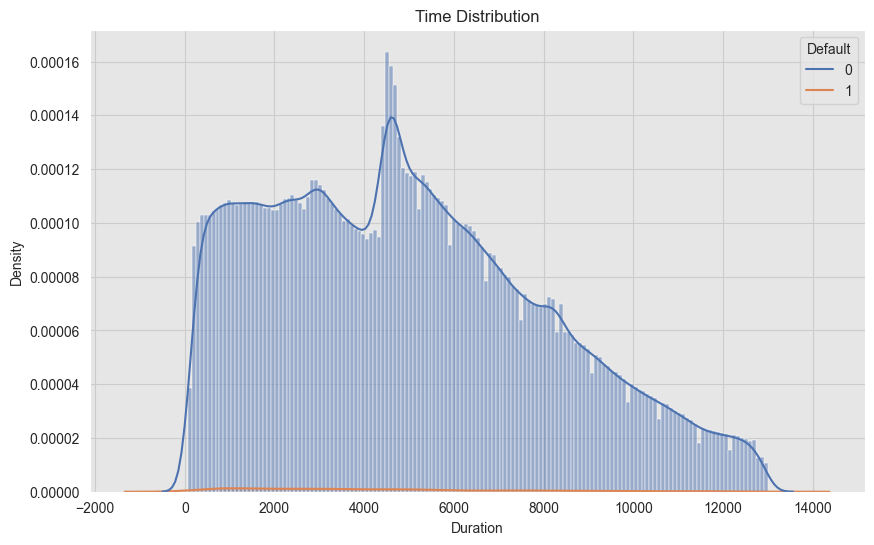

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='Duration', hue='Default', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='Duration', hue='Default', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


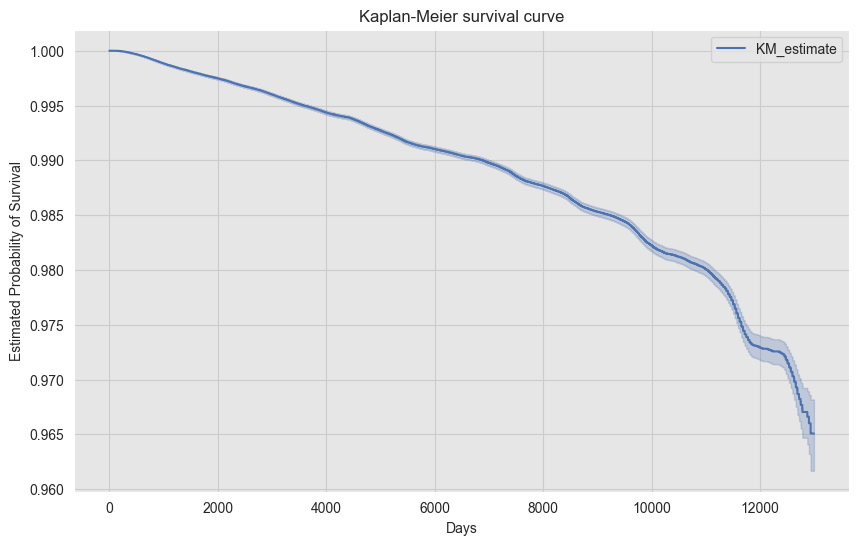

In [57]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['Duration'], event_observed=df['Default'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [58]:
df.columns


Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'curr_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_equity_ratio', 'equity_ratio',
       'financial_leverage_ratio', 'net_profit_margin', 'roa',
       'asset_turnover', 'inventory_turnover', 'inventory_days',
       'receivables_turnover', 'working_capital_turnover', 'pe_ratio',
       'retention_ratio'],
      dtype='object')

In [59]:
from datetime import datetime

date2022 = datetime(2022, 1, 1)
train_df = df[df["date"] < date2022]
test_df = df[df["date"] >= date2022]
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (1110773, 45)
test_df shape: (35646, 45)


In [60]:
test_df.groupby('Default')["CompNo"].count()

Default
0    35490
1      156
Name: CompNo, dtype: int64

In [61]:
156/(35490+156)

0.00437636761487965

In [62]:
# percentile_40 = train_df['DaysDuration'].quantile(0.4)
val_date = datetime(2020, 1, 1)

val_df = train_df[train_df["date"] >= val_date]
train_df = train_df[train_df["date"] < val_date]
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)

train_df shape: (1053354, 45)
val_df shape: (57419, 45)


In [63]:
train_df.groupby("Default")["CompNo"].count()

Default
0    1044800
1       8554
Name: CompNo, dtype: int64

In [64]:
8554/(1044800+8554+14)

0.008120618815076973

In [65]:
val_df.groupby('Default')["CompNo"].count()

Default
0    57118
1      301
Name: CompNo, dtype: int64

In [66]:
301/(57118+301)

0.005242167226876121

In [67]:
train_df.drop(["CompNo", "date"], axis=1, inplace=True)
val_df.drop(["CompNo", "date"], axis=1, inplace=True)
test_df.drop(["CompNo", "date"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_22444\3108148843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["CompNo", "date"], axis=1, inplace=True)


In [68]:
train_df.head()

,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,...,financial_leverage_ratio,net_profit_margin,roa,asset_turnover,inventory_turnover,inventory_days,receivables_turnover,working_capital_turnover,pe_ratio,retention_ratio
0,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,0.000139,...,6.037135,24.982837,-12.570935,0.255210,-0.413,-0.413,1.912130,2.055384,-0.341530,6.787842
1,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,0.038957,...,0.861522,75.426439,-8.322594,0.358015,0.000,0.000,0.574579,0.038721,-35.606061,-73.867110
2,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,0.000300,...,0.707156,52.341576,3.588386,0.236883,-4.463,-4.463,1.295937,0.525214,15.348538,183.313219
3,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,-0.007812,...,0.797336,74.952502,0.577149,0.290137,0.000,0.000,10.253247,-1.942129,12.797619,5.403687
4,2000.0,1,0.089239,0.011089,4.337480,-0.245604,2.227256,-0.159957,-0.074377,0.018289,...,0.998722,-157.397852,-27.807167,0.285404,0.000,0.000,1.291270,0.000000,-4.105839,-161.047245


In [69]:

selected_features = [
       # 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'sic',
       # 'ltq', 'dlcq', 'txditcq', 'cheq', 
       # 'lctq', 'actq', 'invtq', 'intanq',
       # 'oibdpq', 'txpq', 'piq', 'niq', 'revtq', 'cogsq', 'oancfy', 'ivncfy',
       # 'fincfy', 'dltisy', 'dltry', 'ceqq', 'dpq', 'saleq', 'saley', 'invchy',
       # 'rectq', 'wcapq', 'prccq', 'epsf12', 'cshoq', 'dvy', 'req', 'dlttq',
       # 'chechy', 
       'curr_ratio',
       'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_equity_ratio', 'equity_ratio', 'financial_leverage_ratio',
       'net_profit_margin', 'roa', 'asset_turnover', 'inventory_turnover',
       'inventory_days', 'receivables_turnover', 'working_capital_turnover',
       'pe_ratio', 'retention_ratio',
       'Default', 'Duration'
       ]

df_selected_features = df[selected_features]

df_selected_features.describe()



,curr_ratio,quick_ratio,cash_ratio,net_working_capital,debt_ratio,debt_equity_ratio,equity_ratio,financial_leverage_ratio,net_profit_margin,roa,asset_turnover,inventory_turnover,inventory_days,receivables_turnover,working_capital_turnover,pe_ratio,retention_ratio,Default,Duration
count,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06,1.146419e+06
mean,1.238246e+01,1.191869e+01,-4.625497e-02,2.732966e+02,1.298430e+00,1.149420e+00,2.562625e+00,1.172092e+00,-1.944969e+02,-1.549373e+00,5.331782e-01,-7.623309e+01,-7.623309e+01,4.304190e+00,1.023843e+00,1.170721e+01,1.147986e+03,7.860128e-03,4.994528e+03
std,6.073553e+02,6.073611e+02,4.136498e+00,1.780805e+03,3.789255e+00,1.704803e+02,1.302769e+02,9.268954e+01,9.224063e+03,8.115745e+01,4.686322e-01,1.177295e+03,1.177295e+03,7.066260e+01,1.438370e+02,1.641443e+02,8.027137e+05,8.830828e-02,3.082489e+03
min,0.000000e+00,-3.661396e-02,-1.662000e+03,-4.402200e+04,0.000000e+00,-1.920720e+04,-1.125388e+04,-1.643000e+04,-3.921700e+06,-4.960000e+04,-1.916970e+02,-1.503710e+05,-1.503710e+05,-8.646000e+03,-4.336800e+04,-3.115580e+04,-4.318354e+08,0.000000e+00,7.100000e+01
25%,1.209640e+00,8.942440e-01,-1.190391e-01,4.082000e+00,0.000000e+00,9.869882e-05,7.532891e-01,4.192394e-01,2.030680e+01,-9.102759e-01,2.999319e-01,-2.351000e+00,-2.351000e+00,1.018806e+00,1.996070e-02,-2.768809e+00,-1.132986e+02,0.000000e+00,2.465000e+03
50%,1.896036e+00,1.432090e+00,-1.043841e-03,4.005100e+01,2.500365e-01,2.479541e-01,1.101834e+00,8.252958e-01,3.624418e+01,5.357336e-01,4.409830e-01,0.000000e+00,0.000000e+00,1.542480e+00,5.884883e-01,1.220657e+01,2.330576e+01,0.000000e+00,4.698000e+03
75%,3.339878e+00,2.649659e+00,9.938969e-02,1.721890e+02,1.025695e+00,8.202533e-01,1.927496e+00,1.213647e+00,5.546265e+01,1.760472e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.346154e+00,1.501707e+00,2.244444e+01,5.441405e+02,0.000000e+00,7.087000e+03
max,1.036970e+05,1.036970e+05,6.345000e+02,1.117980e+05,4.766019e+02,7.526425e+04,4.065567e+04,4.619600e+04,8.017000e+05,4.212048e+03,5.209331e+01,1.862950e+05,1.862950e+05,2.144300e+04,2.591050e+04,3.189600e+04,6.693781e+07,1.000000e+00,1.299200e+04


In [70]:
val_X = val_df[selected_features]
train_X = train_df[selected_features]
test_X = test_df[selected_features]

# train_X = train_df
# train_X.dropna(inplace=True)
# val_X = val_df
# val_X.dropna(inplace=True)
# test_X = test_df
# test_X.dropna(inplace=True)

In [71]:
train_X

,curr_ratio,quick_ratio,cash_ratio,net_working_capital,debt_ratio,debt_equity_ratio,equity_ratio,financial_leverage_ratio,net_profit_margin,roa,asset_turnover,inventory_turnover,inventory_days,receivables_turnover,working_capital_turnover,pe_ratio,retention_ratio,Default,Duration
0,1.760165,0.972313,-0.008279,22.678,0.542286,3.273856,0.165641,6.037135,24.982837,-12.570935,0.255210,-0.413,-0.413,1.912130,2.055384,-0.341530,6.787842,0,1848.0
1,17.412263,17.412263,8.594851,48.449,0.004630,0.003989,1.160736,0.861522,75.426439,-8.322594,0.358015,0.000,0.000,0.574579,0.038721,-35.606061,-73.867110,0,3785.0
2,4.873087,3.290179,0.440450,48.584,0.000000,0.000000,1.414115,0.707156,52.341576,3.588386,0.236883,-4.463,-4.463,1.295937,0.525214,15.348538,183.313219,0,2786.0
3,0.687909,0.687909,-0.044815,-2.252,3.362907,7.109226,1.269620,0.797336,74.952502,0.577149,0.290137,0.000,0.000,10.253247,-1.942129,12.797619,5.403687,0,472.0
4,6.629682,6.629682,-2.340636,7.966,0.097218,0.097094,1.001279,0.998722,-157.397852,-27.807167,0.285404,0.000,0.000,1.291270,0.000000,-4.105839,-161.047245,0,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053349,0.914728,0.899339,-0.007301,-119.210,5.126684,8.167059,0.627727,1.593049,92.614873,0.432011,0.264125,-6.133,-6.133,1.462582,-3.675682,16.190476,-11626.495740,0,8295.0
1053350,2.405785,1.355570,0.197964,698.765,0.725476,0.840333,0.863319,1.158320,39.199942,2.611502,0.268077,26.369,26.369,1.849332,0.845681,24.960298,3103.660204,0,3611.0
1053351,0.378162,0.372668,0.013104,-127.848,19.544850,1.210093,15.676335,0.059940,41.137478,0.348382,0.249522,0.000,0.000,1.251577,-0.280099,42.047619,-1453.771818,0,4445.0
1053352,1.088985,0.691895,-0.006475,127.800,2.406841,-19.186035,-0.125448,-7.971458,35.614751,1.809131,0.271107,12.400,12.400,1.939815,10.163537,21.074074,2747.253116,0,7952.0


In [72]:
np.isinf(train_X).sum()

curr_ratio                  0
quick_ratio                 0
cash_ratio                  0
net_working_capital         0
debt_ratio                  0
debt_equity_ratio           0
equity_ratio                0
financial_leverage_ratio    0
net_profit_margin           0
roa                         0
asset_turnover              0
inventory_turnover          0
inventory_days              0
receivables_turnover        0
working_capital_turnover    0
pe_ratio                    0
retention_ratio             0
Default                     0
Duration                    0
dtype: int64

In [73]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2, 0.4]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

cph = CoxPHFitter(penalizer=0.1, l1_ratio=1.0)
cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': 0.01})

available_keys = cph.baseline_hazard_['baseline hazard'].keys()
print("Available keys in 'baseline hazard' dictionary:", available_keys)

# baseline_haz = cph.baseline_hazard_['baseline hazard'][12.0]

Available keys in 'baseline hazard' dictionary: Float64Index([   71.0,    72.0,    73.0,    74.0,    75.0,    76.0,    77.0,
                 78.0,    79.0,    80.0,
              ...
              11651.0, 11652.0, 11653.0, 11654.0, 11655.0, 11656.0, 11681.0,
              11682.0, 11683.0, 11684.0],
             dtype='float64', length=11313)


In [74]:
print(df["Duration"].astype)

<bound method NDFrame.astype of 0           1848.0
1           3785.0
2           2786.0
3            472.0
4           1351.0
            ...   
1146414    12992.0
1146415    12991.0
1146416    12992.0
1146417    12992.0
1146418    12992.0
Name: Duration, Length: 1146419, dtype: float64>


In [76]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2, 0.4]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][12]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_df['Default'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_df['Default'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.6372772292646972


[32, 33]

In [ ]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.6540646981457778


[0, 1, 8, 9, 16, 17, 24, 25, 32, 33]

In [ ]:
cph_list[16]

{'cph': <lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 0}

In [ ]:
cph_list[17]

{'cph': <lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [ ]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 564102 total observations, 559786 right-censored observations>
             duration col = 'DaysDuration'
                event col = 'EventType'
                penalizer = 0.7
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 564102
number of events observed = 4316
   partial log-likelihood = -54188.15
         time fit was run = 2023-10-16 15:20:22 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
DTDmedianFin              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianNonFin            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dummy297fin               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sic                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
atq                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
quick_ratio                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_ratio                 0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
financial_leverage_ratio  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
asset_turnover            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
receivables_turnover      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
day_sales_outstanding     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
working_capital_turnover  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
price_to_earnings         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
retention_ratio            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                           cmp to     z    p   -log2(p)
covariate                                              
DTDmedianFin                 0.00 -0.03 0.98       0.03
DTDmedianNonFin              0.00  0.00 1.00       0.00
dummy297fin                  0.00 -0.02 0.98       0.03
sic                          0.00 -0.01 0.99       0.01
atq                          0.00 -0.00 1.00       0.00
current_ratio                0.00 -0.00 1.00       0.00
quick_ratio                  0.00  0.00 1.00       0.00
cash_ratio                   0.00  0.00 1.00       0.00
net_

In [ ]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(564102,)

In [ ]:
roc_auc_score(train_df['EventType'], x_pred)

0.562324285137336

In [ ]:
baseline_haz = cph.baseline_hazard_['baseline hazard'][5201.0]
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(6733,)

In [ ]:
print(test_x_pred.min())
print(test_x_pred.max())


2.896424687152881e-05
2.8964396014021498e-05


In [ ]:
roc_auc_score(test_df['EventType'], test_x_pred)


0.4876278913327061

In [ ]:
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation, concordance_index

# Create the Cox PH model
cph = CoxPHFitter()

# Perform k-fold cross-validation and calculate the concordance index for the Cox PH model
cph_cindex = np.mean(k_fold_cross_validation(cph, df_selected_features, duration_col='DaysDuration', event_col='EventType', k=5, scoring_method=concordance_index))

# Print the average concordance index
print("Average Concordance Index (CoxPH):", cph_cindex)


NotImplementedError: 

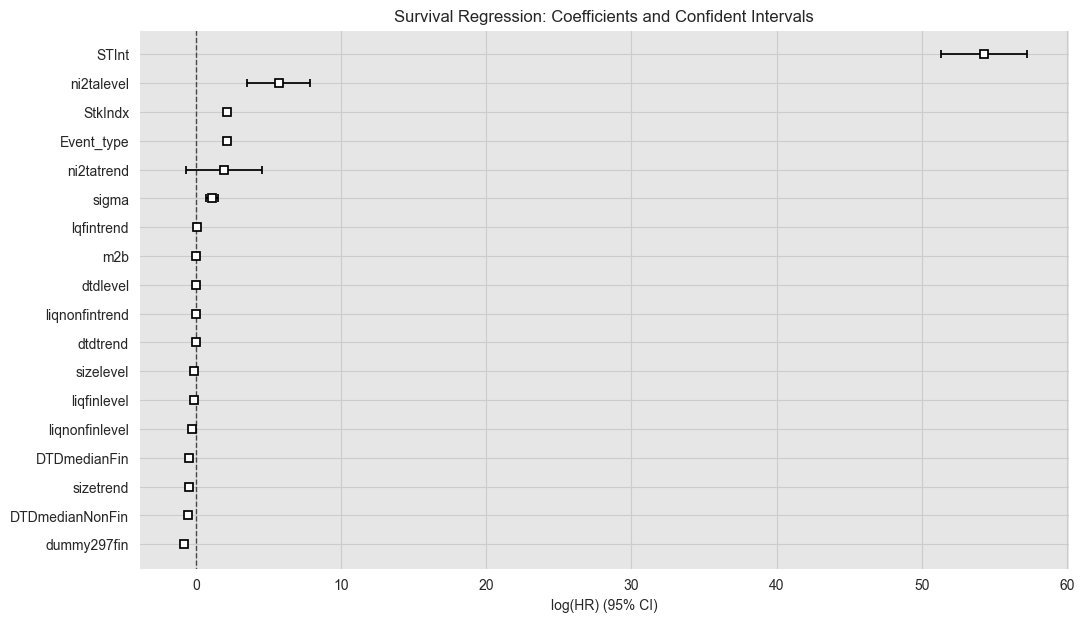

In [ ]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);